# Im2Spec models for converting structure (images) to property (spectra)



---

This notebook demosntrates usage of encoder-decoder neural networks for convering images (structure) to spectra (property).

---



Notebook prepared by Maxim Ziatdinov 

Email: ziatdinovmax@gmail.com

Install AtomAI:

In [6]:
!pip install git+https://github.com/ziatdinovmax/atomai@refactoring --upgrade  # will replace with PyPi version

  Cloning https://github.com/ziatdinovmax/atomai (to revision refactoring) to /tmp/pip-req-build-xb9_4git
  Running command git clone -q https://github.com/ziatdinovmax/atomai /tmp/pip-req-build-xb9_4git
  Running command git checkout -b refactoring --track origin/refactoring
  Switched to a new branch 'refactoring'
  Branch 'refactoring' set up to track remote branch 'refactoring' from 'origin'.
     |████████████████████████████████| 194kB 8.0MB/s 
     |████████████████████████████████| 870kB 28.5MB/s 
  Created wheel for atomai: filename=atomai-0.5.9-cp36-none-any.whl size=103917 sha256=47667828d4b466d2b1a54aedd6c72c1b61e0b26a22eb3905e980b2b88aa4144b
  Stored in directory: /tmp/pip-ephem-wheel-cache-fvtp3did/wheels/07/c1/a0/bb2931940382974a8fd91344bb9587ab720a9fdbe3e5e5ab90
  Created wheel for mendeleev: filename=mendeleev-0.6.1-py2.py3-none-any.whl size=174964 sha256=97a9dbb05a41e92dd6ad074ead3edfcfadf78b3a0c267e711682665f3539b2f4
  Stored in directory: /root/.cache/pip/wheels/fb/

Imports:

In [31]:
import atomai as aoi
import numpy as np
import matplotlib.pyplot as plt

(Down)load training data:

## Im2Spec approach

In im2spec approach, the sub-images representing a local structure are “compressed” via a convolutional neural network architecture to the small number of latent variables, and the latter are “deconvoluted” to yield the spectra. In the spec2im approach, the process is reversed. The networks are implemented using the PyTorch deep leaning library and are available from the accompanying Colab notebook. The architecture of the im2spec model is straightforward. It consists of two parts: an encoder for embedding input images into a latent vector and a decoder for generating one-dimensional signals from the embedded features. The encoder part consists of three back-to-back two-dimensional
convolutional layers, whereas the decoder part represents a pyramid of one-dimensional dilated convolutions with dilation rates of 1, 2, 3, and 4. The dilated convolutions showed superior performance compared to regular convolutional blocks in the decoder. Each convolutional layer in both encoder and decoder parts is formed by running 64 filters (“kernels”) of size 3 on its input and is activated by a leaky rectified linear unit with a negative slope of 0.1. The batch
normalization is applied after each activation to avoid overfitting and improve generalization to new data. The “bottleneck” layer for representing the latent vector is a fully connected layer with the number of neurons equal to the specified number of latent dimensions. 

<img src="https://drive.google.com/uc?export=view&id=18cvXfDdpy1Ij-p1T-jALa_nBZ0iRsalW" width=800 px><br><br>

Here we are going to apply *imspec* approach to two different datasets: i) SPM BEPS dataset obtained by Kyle Kelley, and ii) STEM EELS dataset obtained by Jordan Hachtel. For the details of training/test data preparation, see [this](https://arxiv.org/pdf/2006.01374.pdf) and [this](https://arxiv.org/pdf/2009.09005.pdf) paper.

## Application to SPM BEPS data

(Down)load training data:

In [42]:
download_link = "https://drive.google.com/uc?id=18CjoX3TmZfP2ZAQVEzWalWTvyhapXcS4"
!gdown $download_link -O 'imspec_data.npz'

dataset = np.load('imspec_data.npz')
imgs = dataset['im2spec_images']
spectra = dataset['im2spec_spectra']
specval = dataset['im2spec_specval']

Downloading...
From: https://drive.google.com/uc?id=18CjoX3TmZfP2ZAQVEzWalWTvyhapXcS4
To: /content/imspec_data.npz
100% 468k/468k [00:00<00:00, 68.5MB/s]


Visualize individual image spectra pairs:

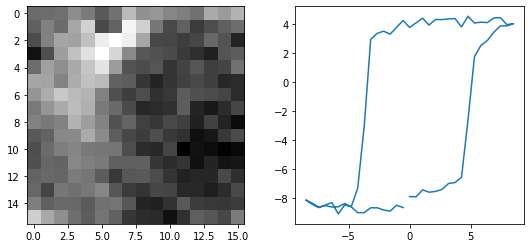

In [43]:
k = 12
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.imshow(imgs[k], cmap='gray')
ax2.plot(specval[0, :64], spectra[k])

Train-test split:

In [37]:
imgs_train, spectra_train, imgs_test, spectra_test = aoi.utils.data_split(imgs, spectra, format_out="torch_float")

Initialize and train ImSpec model:

/usr/local/lib/python3.6/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.6/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.6/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.6/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/120 ... Training loss: 26.0838 ... Test loss: 26.0952 ... GPU memory usage: 1035/15079
Epoch 2/120 ... Training loss: 24.926 ... Test loss: 24.4759 ... GPU memory usage: 1035/15079
Epoch 3/120 ... Training loss: 24.41 ... Test loss: 24.463 ... GPU memory usage: 1035/15079
Epoch 4/120 ... Training loss: 24.0909 ... Test loss: 24.2744 ... GPU memory usage: 1035/15079
Epoch 5/120 ... Training loss: 23.5923 ... Test loss: 24.0855 ... GPU memory usage: 1035/15079
Epoch 6/120 ... Training loss: 23.1414 ... Test loss: 23.0781 ... GPU memory usage: 1035/15079
Epoch 7/120 ... Training loss: 22.6771 ... Test loss: 22.8791 ... GPU memory usage: 1035/15079
Epoch 8/120 ... Training loss: 22.3517 ... Test loss: 22.0524 ... GPU memory usage: 1035/15079
Epoch 9/120 ... Training loss: 21.8273 ... Test loss: 21.9811 ... GPU memory usage: 1035/15079
Epoch 10/120 ... Training loss: 21.4356 ... Test loss: 21.1353 ... GPU memory usage: 1035/15079
Epoch 11/120 ... Training loss: 21.0802 ... Test loss

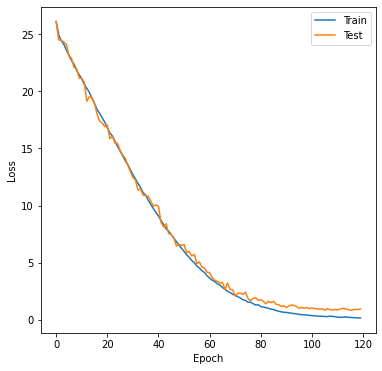

In [38]:
in_dim = (16, 16)
out_dim = (64,)

model = aoi.models.ImSpec(in_dim, out_dim, latent_dim=10, seed=2)

model.fit(imgs_train, spectra_train, imgs_test, spectra_test,  # training data
          full_epoch=True, training_cycles=120, swa=True, batch_norm=True)  # training parameters

Make a prediction with the trained model:

In [39]:
prediction = model.predict(imgs_test, norm=False)

Batch 10/10
174 images were decoded in approximately 0.7281 seconds


Visualize predicted spectra for selected test images:

(note that predictions get improved as if we train longer)

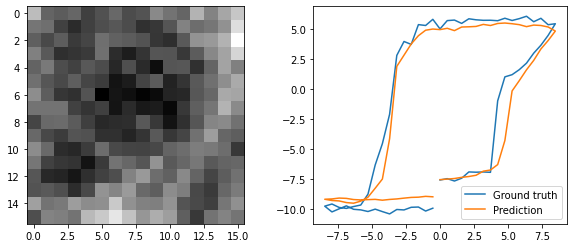

In [41]:
k = 150

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow(imgs_test[k], cmap='gray', label="Input image")
ax2.plot(specval[0,:64], spectra_test[k], label="Ground truth")
ax2.plot(specval[0,:64], prediction[k], label="Prediction")
plt.legend()

## Application to STEM EELS data

(Down)load data:

In [2]:
!gdown https://drive.google.com/uc?id=18erLubezBOzIinKscQfq49Al4pxwS0-w

Downloading...
From: https://drive.google.com/uc?id=18erLubezBOzIinKscQfq49Al4pxwS0-w
To: /content/eels_imspec.npz
50.0MB [00:00, 88.6MB/s]


In [44]:
dataset = np.load('eels_imspec.npz')
imgs = dataset['imgs']
spectra = dataset['spectra']
specval = dataset['specval']

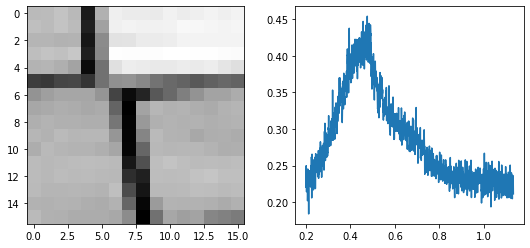

In [48]:
k = 12
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.imshow(imgs[k], cmap='gray')
ax2.plot(specval, spectra[k])

Train-test split:

In [13]:
imgs_train, spectra_train, imgs_test, spectra_test = aoi.utils.data_split(imgs, spectra, format_out="torch_float")

Initialize and train ImSpec model (same parameters as above):

/usr/local/lib/python3.6/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.6/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.6/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.6/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/120 ... Training loss: 1.383 ... Test loss: 3.5227 ... GPU memory usage: 1909/15079
Epoch 2/120 ... Training loss: 1.1435 ... Test loss: 0.9937 ... GPU memory usage: 1909/15079
Epoch 3/120 ... Training loss: 0.9658 ... Test loss: 0.8947 ... GPU memory usage: 1909/15079
Epoch 4/120 ... Training loss: 0.8185 ... Test loss: 0.765 ... GPU memory usage: 1909/15079
Epoch 5/120 ... Training loss: 0.6953 ... Test loss: 0.6755 ... GPU memory usage: 1909/15079
Epoch 6/120 ... Training loss: 0.592 ... Test loss: 0.5663 ... GPU memory usage: 1909/15079
Epoch 7/120 ... Training loss: 0.5052 ... Test loss: 0.4972 ... GPU memory usage: 1909/15079
Epoch 8/120 ... Training loss: 0.4321 ... Test loss: 0.4035 ... GPU memory usage: 1909/15079
Epoch 9/120 ... Training loss: 0.3704 ... Test loss: 0.3598 ... GPU memory usage: 1909/15079
Epoch 10/120 ... Training loss: 0.3183 ... Test loss: 0.3179 ... GPU memory usage: 1909/15079
Epoch 11/120 ... Training loss: 0.274 ... Test loss: 0.2728 ... GPU memo

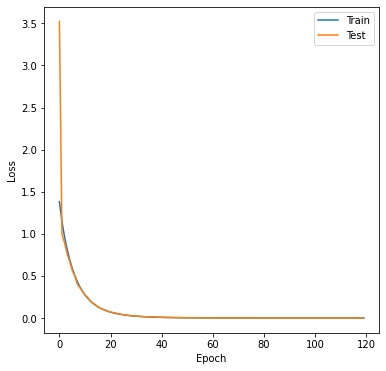

In [15]:
in_dim = (16, 16)
out_dim = (2048,)

model = aoi.models.ImSpec(in_dim, out_dim, latent_dim=10, seed=2)

model.fit(imgs_train, spectra_train, imgs_test, spectra_test,  # training data
          full_epoch=True, training_cycles=120, swa=True, batch_norm=True)  # training parameters

Make prediciton on test data:

In [21]:
prediction = model.predict(imgs_test, norm=False)

Batch 10/10
408 images were decoded in approximately 2.1185 seconds


Visualize for selected test image: 

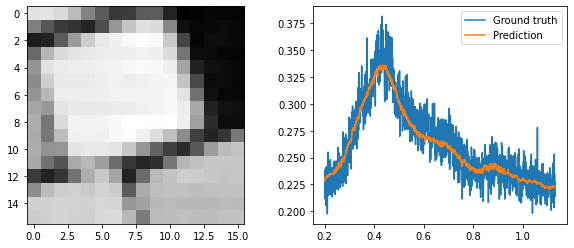

In [30]:
k = 100

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow(imgs_test[k], cmap='gray', label="Input image")
ax2.plot(specval, spectra_test[k], label="Ground truth")
ax2.plot(specval, prediction[k], label="Prediction")
plt.legend()